imported all the libraries needed for the process

In [1]:
from scipy.signal import filtfilt
from scipy.signal import butter,lfilter
from scipy.signal import freqs,freqz
import numpy as np
from scipy.fft import fft,ifft,fftfreq
import pandas as pd
import matplotlib.pyplot as plt 

from scipy import signal
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import ipywidgets as widgets

    define a function that returns filter coefficients 


In [2]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)#parameters for filters/filter coefficients/coeff of digital transfer fn
    return b, a

    cutoff- cutoff freq at which the signal strength has detoriated by 3db
    nyq = nyquist frequency
    b,a = filter coeff

    defining a function for filtering the data

In [3]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)#fir filter
    return y

    b,a = filter coeff
    y=filtered data 


    define a function that returns filter coefficients 

In [4]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')#parameters for filters/filter coefficients/coeff of digital transfer fn
    return b, a

    cutoff- cutoff freq at which the signal strength has detoriated by 3db
    nyq = nyquist frequency
    b,a = filter coeff

    defining a function for filtering the data

In [5]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)#fir filter
    return y

    b,a = filter coeff
    y=filtered data 


    b,a = filter coeff
    y=filtered data 


    define a function that returns filter coefficients 

In [6]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs #half of cutoff frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)#parameters for filters/filter coefficients/coeff of digital transfer fn
    return b, a


    cutoff- cutoff freq at which the signal strength has detoriated by 3db
    nyq = nyquist frequency
    b,a = filter coeff

    defining a function for filtering the data

In [7]:
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order) 
    y = lfilter(b, a, data)#fir filter
    return y

    cutoff- cutoff freq at which the signal strength has detoriated by 3db
    nyq = nyquist frequency
    b,a = filter coeff

    b,a = filter coeff
    y=filtered data 


data input 

In [8]:
my_step=pd.read_csv('sensor.csv')#data input
my_step.head()


,Time,X,Y,Z
0,1622214974579,-0.134344,0.609089,0.838767
1,1622214974620,-0.063149,0.659804,0.742702
2,1622214974662,-0.053640,0.668825,0.717101
3,1622214974704,-0.041693,0.666143,0.736607
4,1622214974746,-0.066562,0.669800,0.760257


#warning do not run the below block more that once its a double edged sword 

In [9]:
my_step['Time']=(my_step['Time']-1622214974579)/1000
X=my_step['X']#taking x component of the inputed data
time_of_event=np.linspace(0,20,len(X))#creating equally spaced time intervels between 0 and 20
my_step.iplot(kind='line',x='Time',y='X',size=10,xTitle='time',yTitle='acceleration')

In [10]:
x=np.array(X)
freqs = fftfreq(x.size, 0.05)#calculate frequency currusponding to fft
x_mean=np.mean(x)#mean for the data
x_norm=x-x_mean#normalizing the data 
fft_unnorm=fft(x)#fft of unnormalized data
fft_norm=fft(x_norm)#fft of normalized data
mag_norm=abs(fft_norm)**2/20
mag_unnorm=abs(fft_unnorm)**2/20


plot for psd of unnormalized data

Text(0, 0.5, 'power')

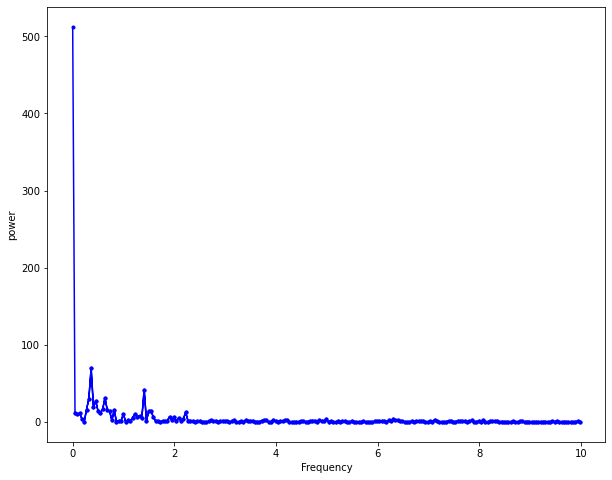

In [11]:
plt.figure(figsize=(10,8))
plt.plot(abs(freqs),mag_unnorm,'b.-')
plt.xlabel('Frequency')
plt.ylabel('power')

psd of normalized data

Text(0, 0.5, 'power')

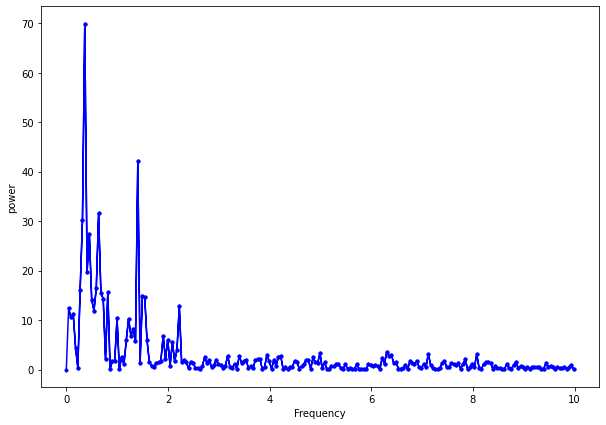

In [12]:
plt.figure(figsize=(10,7))
plt.plot(abs(freqs),mag_norm,'b.-')
plt.xlabel('Frequency')
plt.ylabel('power')

psd using welches method

Text(0, 0.5, 'power spectral density')

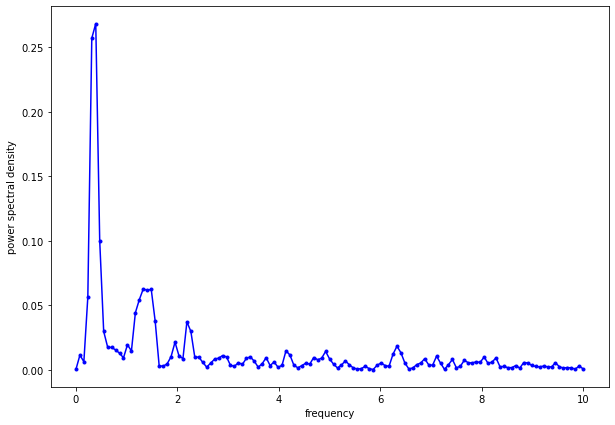

In [13]:
plt.figure(figsize=(10,7))
freq,psd=signal.welch(X,20)
plt.plot(freq,psd,'b.-')#plotting psd using welches method
plt.xlabel('frequency')
plt.ylabel('power spectral density')

from above data we can conclude that the max effect is due to frequencies between 0,2 we the best result for this data will be achieved when using a lowpass filter 

In [14]:
cutoff_high=4#cutoff for highpass filter 
cutoff_low=3#cutoff for lowpass filter
lowcut=0.5#cutoff for bandpass filter
highcut=2.5#cutoff for bandpass filter
fs=20
order=8#reason for order 


   # filter coeff

In [15]:
b,a=butter_bandpass(lowcut,highcut,fs,8)
b1,a1= butter_lowpass(cutoff_low,fs,order)
b2,a2=butter_highpass(cutoff_high,fs,order)

values of frequency at which digital transfer fn is calculated and the value of digital transfer fn at those values

plotting frequency vs digital transfer fn vs frequency for bandpass

In [16]:
@widgets.interact(lower_freq=(0, 9, 0.1),high_freq=(0,9,0.1),order=(0,20,1))
def highpassass_plot(lower_freq,high_freq,order):
    b,a=butter_bandpass(lower_freq,high_freq,fs,order)
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(10,7))
    plt.subplot(3, 1, 1)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.plot(lower_freq, 0.5*np.sqrt(2), 'ko')
    plt.plot(high_freq, 0.5*np.sqrt(2), 'ko')
    plt.axvline(lower_freq,color='k')
    plt.axvline(high_freq,color='k')
    plt.xlim(0, 0.5*fs)
    plt.title("bandpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()

interactive(children=(FloatSlider(value=4.0, description='lower_freq', max=9.0), FloatSlider(value=4.0, descri…

plotting frequency vs digital transfer fn vs frequency for lowpass

In [17]:
@widgets.interact(cutoff=(0, 9, 1),order=(0,20,1))
def lowpass_dtf(cutoff,order):
  b1,a1= butter_lowpass(cutoff,fs,order)#filter coeff
  w1,hi=freqz(b1, a1, worN=8000)#h ratio of filtered data vs input data w,he frequencies at which `h` was computed for low pass
  plt.figure(figsize=(10,7))
  plt.subplot(2, 1, 1)
  plt.plot(0.5*fs*w1/np.pi, np.abs(hi), 'b')
  plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
  plt.axvline(cutoff, color='k')
  plt.xlim(0, 0.5*fs)
  plt.title("Lowpass Filter Frequency Response")
  plt.xlabel('Frequency [Hz]')
  plt.grid()

interactive(children=(IntSlider(value=4, description='cutoff', max=9), IntSlider(value=10, description='order'…

plotting frequency vs digital transfer fn vs frequency for highpass

In [18]:
@widgets.interact(cutoff=(0, 9, 1),order=(0,20,1))
def highpass_dtf(cutoff,order):
  b2,a2= butter_highpass(cutoff,fs,order)
  w2,h2=freqz(b2, a2, worN=8000)#h ratio of filtered data vs input data w,he frequencies at which `h` was computed for low pass
  plt.figure(figsize=(10,7))
  plt.subplot(2, 1, 1)
  plt.plot(0.5*fs*w2/np.pi, np.abs(h2), 'b')
  plt.plot(cutoff, 0.5*np.sqrt(2),'ko')
  plt.axvline(cutoff, color='k')
  plt.xlim(0, 0.5*fs)
  plt.title("highpass Filter Frequency Response")
  plt.xlabel('Frequency [Hz]')
  plt.grid()

interactive(children=(IntSlider(value=4, description='cutoff', max=9), IntSlider(value=10, description='order'…

plot of filtered data vs actual data for low pass filter

In [19]:
#fig, ax = plt.subplots(1,1,figsize=(6, 4))
# ax.set_ylim([-4, 4])
#ax.grid(True)
T=20
n = int(T * fs) # total number of samples
t = np.linspace(0, T, len(x), endpoint=False)
# Filter the data, and plot both the original and filtered signals.
@widgets.interact(cutoff1=(0, 9, 0.1),order=(0,20,1))
def plot_lowpass(cutoff1,order):
  #y = butter_lowpass_filter(x,cutoff1,fs, order)
  plt.figure(figsize=(10,7))
  plt.subplot(2, 1, 2)

  plt.plot(t, x, 'b-', label='data')
  plt.plot(t,  butter_lowpass_filter(x,cutoff1,fs, order), 'g-', linewidth=2, label='filtered data')
  plt.xlabel('Time [sec]')
  plt.grid()
  plt.legend()
  plt.ylabel('acceleration ')
  plt.subplots_adjust(hspace=0.35)
  plt.show()
  


  

interactive(children=(FloatSlider(value=4.0, description='cutoff1', max=9.0), IntSlider(value=10, description=…

plot of filtered data vs actual data for high pass filter

In [20]:
T = 20    # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, len(x), endpoint=False)

# Filter the data, and plot both the original and filtered signals.
@widgets.interact(cutoff2=(0, 9, 1),order=(0,20,1))
def plot_highpass(cutoff2,order):
 
  plt.figure(figsize=(10,10))
  plt.subplot(2, 1, 2)
  plt.plot(t, x, 'b-', label='data')
  plt.plot(t,butter_highpass_filter(x, cutoff2, fs, order), 'g-', linewidth=2, label='filtered data')
  plt.xlabel('Time [sec]')
  plt.grid()
  plt.legend()
  plt.ylabel('acceleration ')
  plt.subplots_adjust(hspace=0.35)
  plt.show()

interactive(children=(IntSlider(value=4, description='cutoff2', max=9), IntSlider(value=10, description='order…

plot of filtered data vs actual data for band pass filter

In [21]:
T = 20    # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, len(x), endpoint=False)


# Filter the data, and plot both the original and filtered signals.
@widgets.interact(cutoff3=(0, 9, 0.1),cutoff4=(1,9,1),order=(0,20,1))
def plot_highpass(cutoff3,cutoff4,order):
  butter_bandpass_filter(x, cutoff3,cutoff4, fs, order)
  plt.figure(figsize=(10,10))
  plt.subplot(2, 1, 2)
  plt.plot(t, x, 'b-', label='data')
  plt.plot(t,  butter_bandpass_filter(x, cutoff3,cutoff4, fs, order), 'g-', linewidth=2, label='filtered data')
  plt.xlabel('Time [sec]')
  plt.ylabel('acceleration ')
  plt.grid()
  plt.legend()

  plt.subplots_adjust(hspace=0.35)
  plt.show()

interactive(children=(FloatSlider(value=4.0, description='cutoff3', max=9.0), IntSlider(value=5, description='…

plotting filtered data for lowpass filter

In [22]:
@widgets.interact(cutoff=(0, 9, 0.1),order=(0,20,1))
def lowpass_plot(cutoff,order):
  plt.figure(figsize=(10,6))
  plt.plot(t,butter_lowpass_filter(x,cutoff,fs, order))#lowpass
  plt.xlabel('Time [sec]')
  plt.ylabel('acceleration')

interactive(children=(FloatSlider(value=4.0, description='cutoff', max=9.0), IntSlider(value=10, description='…

plotting filtered data for high filter

In [23]:
@widgets.interact(cutoff=(0, 9, 0.1),order=(0,20,1))
def highpassass_plot(cutoff,order):
  plt.plot(t,butter_highpass_filter(x,cutoff,fs, order))#highpass
  plt.xlabel('Time [sec]')
  plt.ylabel('acceleration')

interactive(children=(FloatSlider(value=4.0, description='cutoff', max=9.0), IntSlider(value=10, description='…

plotting filtered data for bandpass filter

In [24]:
@widgets.interact(lower_freq=(0, 9, 0.1),high_freq=(0,9,0.1),order=(0,20,1))
def highpassass_plot(lower_freq,high_freq,order):
  plt.plot(t,butter_bandpass_filter(x,lower_freq,high_freq,fs, order))#bandpass
  plt.xlabel('Time [sec]')
  plt.ylabel('acceleration')

interactive(children=(FloatSlider(value=4.0, description='lower_freq', max=9.0), FloatSlider(value=4.0, descri…

# as it can be seen high pass filter is of no use
# bandpass filter is only usefull if the lowcut frequency is close to 0
# lowpass filter captures the esence of data properly